# Two Sigma Connect: Rental Listing Inquiries

## RoadMap Of The Project
1. Problem Statement
2. Dataset Info
3. Basic EDA
4. EDA
5. Feature Engineering
6. Model Building
7. Feature Selection
8. Hyperparameter Tuning
9. Making Prediction On Test Data
10. Making Submission File
11. Summary Of The Project

## Problem Statement: 
To predict how popular an apartment rental listing is based on given dataset 

## About The Dataset:
You will predict how popular an apartment rental listing is based on the listing content like text description, photos, number of bedrooms, price, etc.
The target variable, interest_level, is defined by the number of inquiries a listing has in the duration that the listing was live on the site. 


### File descriptions:

#### 1. train.json
the training set
#### 2. test.json
the test set
#### 3. sample_submission.csv
a sample submission file in the correct format
#### 4. images_sample.zip
listing images organized by listing_id (a sample of 100 listings)
#### 5. Kaggle-renthop.7z 
(optional) listing images organized by listing_id. Total size: 78.5GB 
compressed. Distributed by BitTorrent (Kaggle-renthop.torrent). 


### Dataset info
1. bathrooms: number of bathrooms
2. bedrooms: number of bedrooms
3. building_id: id of building where an apartment in located
4. created: date and time at which an apartment id creadted
5. description: description of an apartment
6. display_address: address of an apartment
7. features: a list of features about of an apartment
8. latitude: latitude of the apartment
9. listing_id: listing id of an apartment
10. longitude: longitude of an apartment
11. manager_id: id of the manager who manages the apartment
12. photos: a list of photo links. You are welcome to download the pictures yourselves from renthop's site, but they are the same as imgs.zip. 
13. price: in USD
14. street_address: the address of the nearest street
15. interest_level: this is the target variable. It has 3 categories: 'high', 'medium', 'low'

Here is the kaagle competition link
https://www.kaggle.com/competitions/two-sigma-connect-rental-listing-inquiries/data

## Basic EDA

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading train dataset
train = pd.read_json(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\sigma\train\train.json")

In [3]:
#Reading test dataset
test = pd.read_json(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\sigma\test\test.json")

In [4]:
#Checking head of train and test
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [5]:
test.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.0,1,79780be1514f645d7e6be99a3de696c5,2016-06-11 05:29:41,Large with awesome terrace--accessible via bed...,Suffolk Street,"[Elevator, Laundry in Building, Laundry in Uni...",40.7185,7142618,-73.9865,b1b1852c416d78d7765d746cb1b8921f,[https://photos.renthop.com/2/7142618_1c45a2c8...,2950,99 Suffolk Street
1,1.0,2,0,2016-06-24 06:36:34,Prime Soho - between Bleecker and Houston - Ne...,Thompson Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7278,7210040,-74.0000,d0b5648017832b2427eeb9956d966a14,[https://photos.renthop.com/2/7210040_d824cc71...,2850,176 Thompson Street
2,1.0,0,0,2016-06-17 01:23:39,Spacious studio in Prime Location. Cleanbuildi...,Sullivan Street,"[Pre-War, Dogs Allowed, Cats Allowed]",40.7260,7174566,-74.0026,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7174566_ba3a35c5...,2295,115 Sullivan Street
3,1.0,2,f9c826104b91d868e69bd25746448c0c,2016-06-21 05:06:02,For immediate access call Bryan.<br /><br />Bo...,Jones Street,"[Hardwood Floors, Dogs Allowed, Cats Allowed]",40.7321,7191391,-74.0028,41735645e0f8f13993c42894023f8e58,[https://photos.renthop.com/2/7191391_8c2f2d49...,2900,23 Jones Street
5,1.0,1,81062936e12ee5fa6cd2b965698e17d5,2016-06-16 07:24:27,Beautiful TRUE 1 bedroom in a luxury building ...,Exchange Place,"[Roof Deck, Doorman, Elevator, Fitness Center,...",40.7054,7171695,-74.0095,a742cf7dd3b2627d83417bc3a1b3ec96,[https://photos.renthop.com/2/7171695_089ffee2...,3254,20 Exchange Place


In [6]:
#taking the len of train and test dataset 
len_train = len(train)
len_test = len(test)

In [7]:
#Concatinating train and test datasets two make it easier to make changes
df = pd.concat([train, test])
df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124011 entries, 4 to 124010
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   bathrooms        124011 non-null  float64
 1   bedrooms         124011 non-null  int64  
 2   building_id      124011 non-null  object 
 3   created          124011 non-null  object 
 4   description      124011 non-null  object 
 5   display_address  124011 non-null  object 
 6   features         124011 non-null  object 
 7   latitude         124011 non-null  float64
 8   listing_id       124011 non-null  int64  
 9   longitude        124011 non-null  float64
 10  manager_id       124011 non-null  object 
 11  photos           124011 non-null  object 
 12  price            124011 non-null  int64  
 13  street_address   124011 non-null  object 
 14  interest_level   49352 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 15.1+ MB


In [9]:
#There are total 15 columns and total 124011 rows

In [10]:
#checking the description of the dataframe
df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,124011.000000,124011.000000,124011.000000,1.240110e+05,124011.000000,1.240110e+05
mean,1.212622,1.543460,40.737641,7.024022e+06,-73.949434,3.781324e+03
std,0.595209,1.110203,0.744337,1.263795e+05,1.372882,1.582988e+04
min,0.000000,0.000000,0.000000,6.811957e+06,-121.488000,1.000000e+00
25%,1.000000,1.000000,40.728000,6.915638e+06,-73.991700,2.495000e+03
50%,1.000000,1.000000,40.751700,7.021451e+06,-73.977800,3.150000e+03
75%,1.000000,2.000000,40.774300,7.129028e+06,-73.954700,4.100000e+03
max,112.000000,8.000000,44.883500,7.761779e+06,0.000000,4.490000e+06


In [11]:
#Checking null values
df.isnull().sum()

bathrooms              0
bedrooms               0
building_id            0
created                0
description            0
display_address        0
features               0
latitude               0
listing_id             0
longitude              0
manager_id             0
photos                 0
price                  0
street_address         0
interest_level     74659
dtype: int64

### Summary
1. train dataset contains 49352 rows and 15 columns, 6 numerical columns and 9 categorical columns
2. test dataset contains 74659 rows and 14 columns 6 numerical columns and 8 categorical columns
3. df contains 124011 total rows
4. There is a high standard deviation in price which shows price is increasing gradually
5. df has no null values except interest level, because we concatenated train and test, test has no interest level column

## EDA

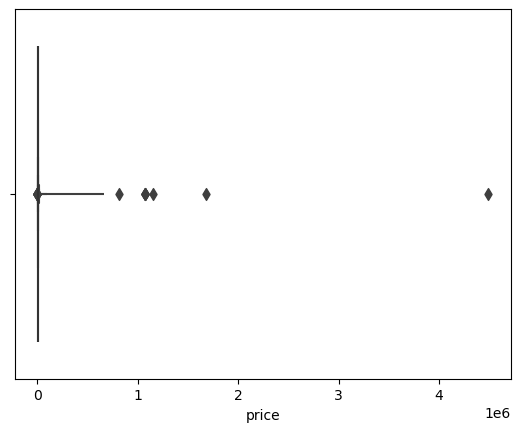

In [12]:
sns.boxenplot(df['price'])
plt.show()

<AxesSubplot:xlabel='price', ylabel='count'>

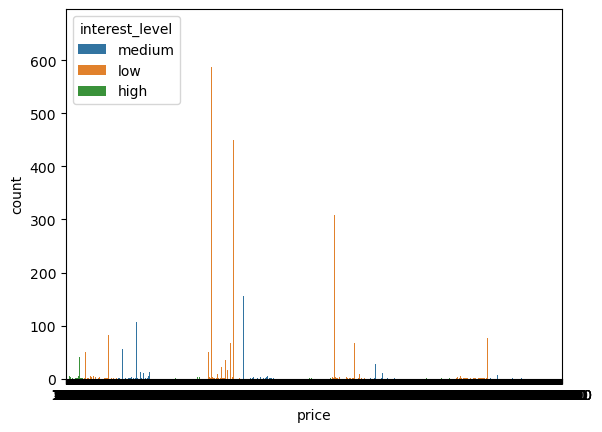

In [13]:
sns.countplot(df['price'],hue=df['interest_level'])

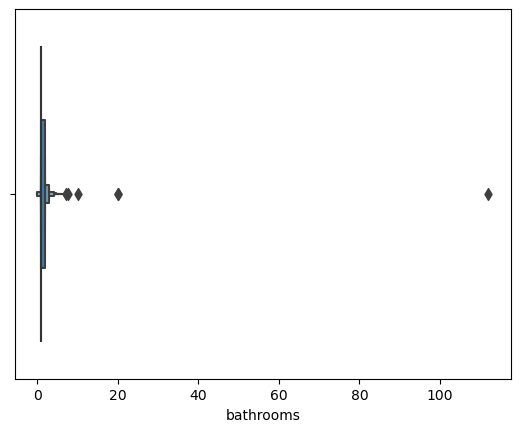

In [14]:
sns.boxenplot(df['bathrooms'])
plt.show()

Most of the bathrooms are present less than 20

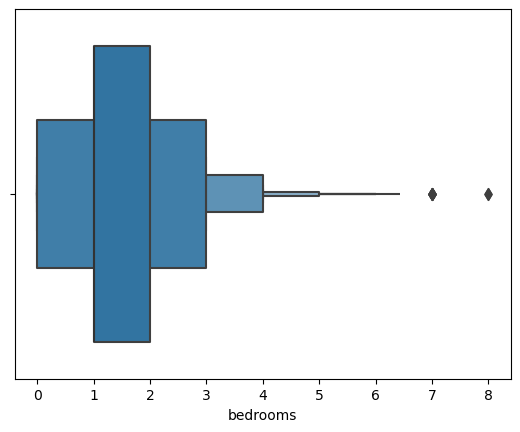

In [15]:
sns.boxenplot(df['bedrooms'])
plt.show()

The higher number of bedrooms are 1 or 2

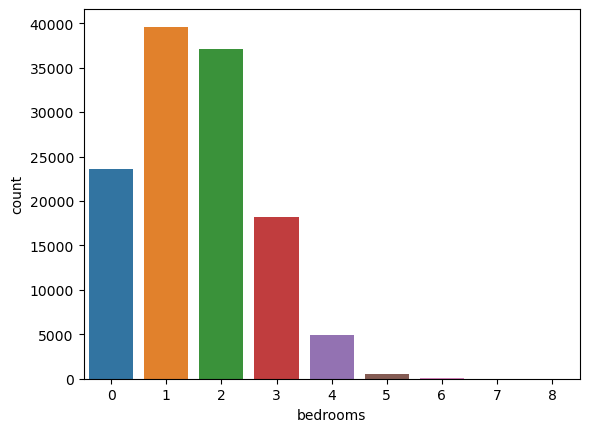

In [16]:
sns.countplot(df['bedrooms'])
plt.show()

Most of the rooms contains 1 or 2 bedrooms

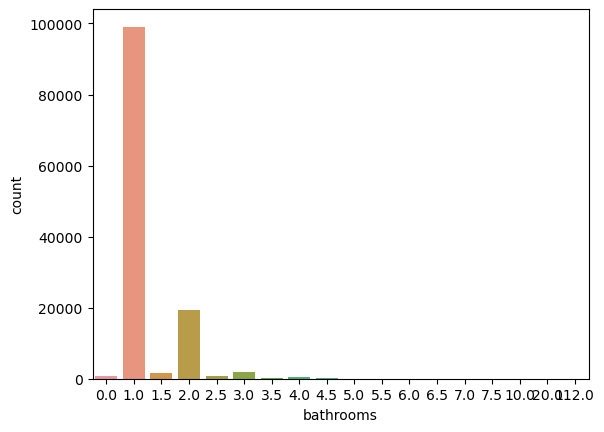

In [17]:
sns.countplot(df['bathrooms'])
plt.show()

The of the apartment contains 1 bathroom

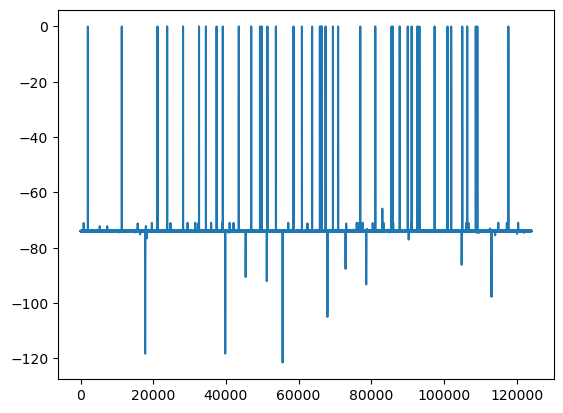

In [18]:
plt.plot(df['longitude'])
plt.show()

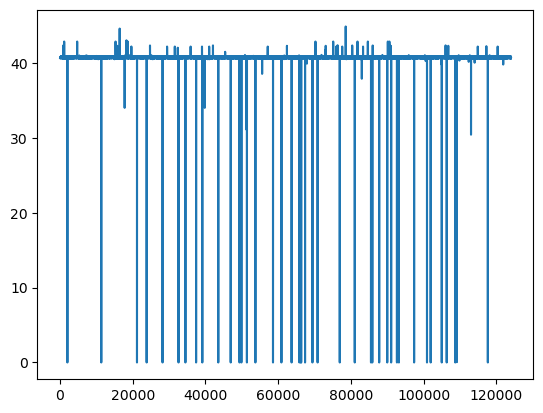

In [19]:
plt.plot(df['latitude'])
plt.show()

<AxesSubplot:xlabel='manager_id', ylabel='count'>

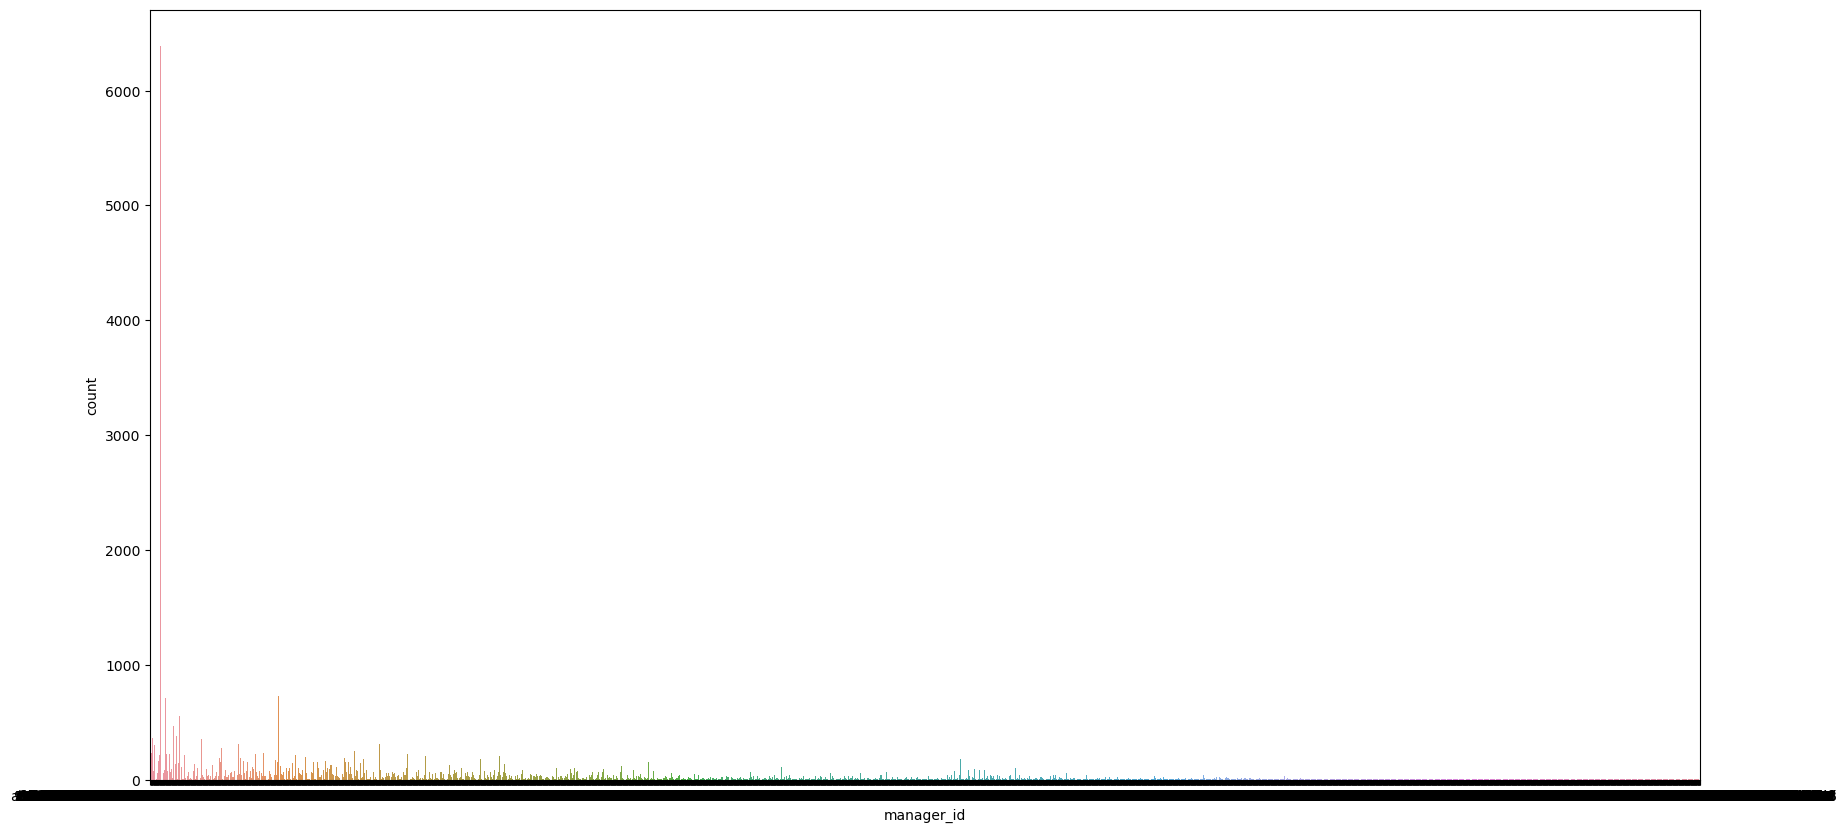

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(df['manager_id'])

### Summary
1. There are a lot of outliers in price column
2. Most apartments have 1 or 2 bedrooms
3. Most apartments have 1 or 2 bathrooms
4. There is a high count of price of apartments at low interest level 

## Feature Engineering

#### We will do freature engineering on some categorical features to convert them into numerical

In [21]:
#Making a new feature by taking len of building id
df['len_building_id'] = df['building_id'].apply(len)

In [22]:
#Making a new feature by taking len of description
df['len_description'] = df['description'].apply(len)

In [23]:
#Making a new feature by taking len of display address
df['len_display_address'] = df['display_address'].apply(len)

In [24]:
#Making a new feature by taking len of features variable
df['len_features'] = df['features'].apply(len)

In [25]:
#Making a new feature by taking len of photos feature
df['len_photos'] = df['photos'].apply(len)

In [26]:
#Making a new feature by taking len of street address feature
df['len_street_address'] = df['street_address'].apply(len)

In [27]:
#making a new feature by counting total rooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [28]:
df['created'] = pd.to_datetime(df['created']) #converting to datetime
df['year'] = df['created'].dt.year #Creating a new feature year from created feature

df['month'] = df['created'].dt.month #Creating a new feature month from created feature

df['week'] = df['created'].dt.week #Creating a new feature week from created feature

df['day'] = df['created'].dt.day #creating a day feature

df['day_name'] = df['created'].dt.day_name()

df['hour'] = df['created'].dt.hour # creating hour feature

In [29]:
le = LabelEncoder() #instanciated label encoder
df['building_id'] = le.fit_transform(df['building_id']) #Converting building id to numerical feature by label encoding

In [30]:
df['manager_id'] = le.fit_transform(df['manager_id'])
#converting manager_id to numerical by label encoding

In [31]:
#checking categorical variables
categorical = df.select_dtypes(include='object')
categorical 

,description,display_address,features,photos,street_address,interest_level,day_name
4,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",[https://photos.renthop.com/2/7170325_3bb5ac84...,145 Borinquen Place,medium,Thursday
6,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",[https://photos.renthop.com/2/7092344_7663c19a...,230 East 44th,low,Wednesday
9,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",[https://photos.renthop.com/2/7158677_c897a134...,405 East 56th Street,medium,Tuesday
10,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],[https://photos.renthop.com/2/7211212_1ed4542e...,792 Metropolitan Avenue,medium,Friday
15,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",[https://photos.renthop.com/2/7225292_901f1984...,340 East 34th Street,low,Tuesday
...,...,...,...,...,...,...,...
124003,BRAND NEW TO MARKET 1BDR \r107TH AND LEXINGTON...,150 EAST 107TH STREET,[],[https://photos.renthop.com/2/6928108_231eb983...,158 EAST 107TH STREET,NaN,Tuesday
124005,Convertible 2BR apartment features a brand new...,E 33rd St.,"[Doorman, Elevator, Laundry in Building, Dishw...",[https://photos.renthop.com/2/6906674_9fe899a8...,141 E 33rd St.,NaN,Thursday
124006,"Let's get you in to see this $2,400/mo, recent...",Lexington Avenue,"[Dogs Allowed, Cats Allowed]",[],95 Lexington Avenue,NaN,Wednesday
124007,CooperCooper.com :: Web ID #171357; Access 100...,Park Avenue,"[Doorman, Elevator, Cats Allowed, Dogs Allowed]",[https://photos.renthop.com/2/6842183_b1fe51f4...,41 Park Avenue,NaN,Friday


In [32]:
#Dropping the categorical columns
cols_to_drop = ['description','display_address','features','photos','street_address','building_id','created']
df.drop(columns=cols_to_drop,axis=1,inplace=True)

In [33]:
#Mapping different interest levels with numbers
interest = {'low':0, 'medium': 1, 'high': 2}
df['interest_level'] = df['interest_level'].map(interest)

### You can try feature engineering techniques given below

1. You can try lebel encoding for given features: building_id, description, display_address, features, manager_id, street_address, photos
2. You can try cleaning text features and creating new feature by using CountVectorizer or any other method, after this you can use feature selection methods like RFE for selecting important features, because CountVectorizer will create many features
3. You can try PCA and KMeans and check for accuracy

## EDA II

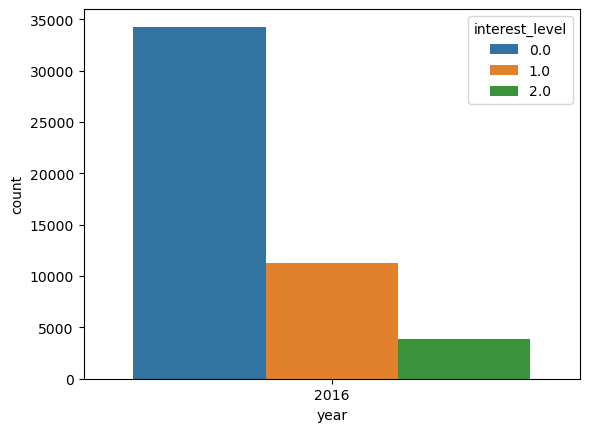

In [34]:
sns.countplot(df['year'],hue=df['interest_level'])
plt.show()

We have only one year of data
interest level zero low showing maximum number of counts


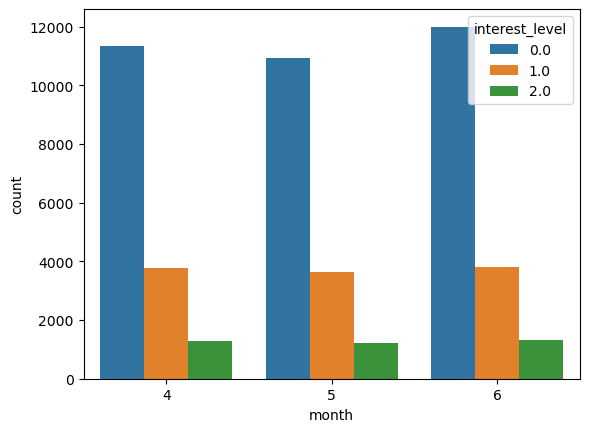

In [35]:
sns.countplot(df['month'],hue=df['interest_level'])
plt.show()

The count for all the months with different interest levels looks same

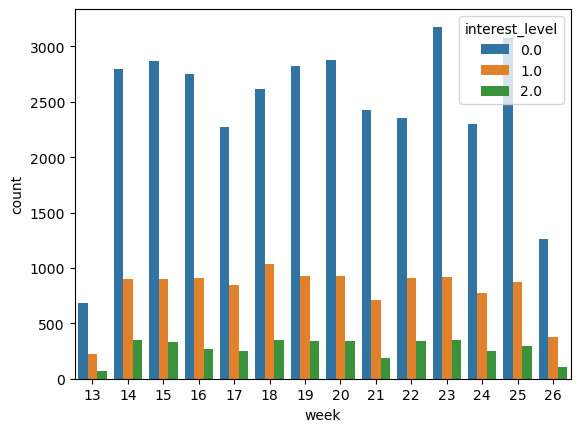

In [36]:
sns.countplot(df['week'],hue=df['interest_level'])
plt.show()

The count of interest levesl for week shows slight changes

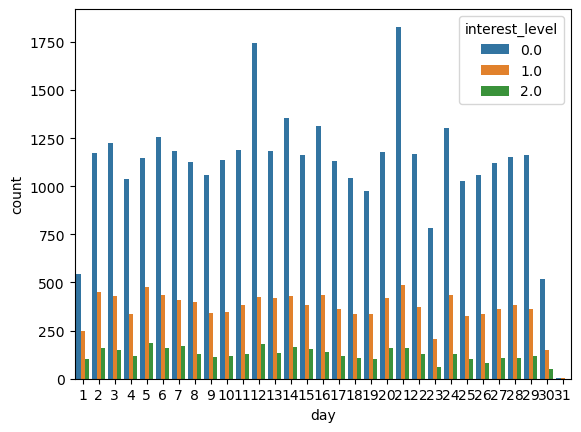

In [37]:
sns.countplot(df['day'],hue=df['interest_level'])
plt.show()

<AxesSubplot:xlabel='day_name', ylabel='count'>

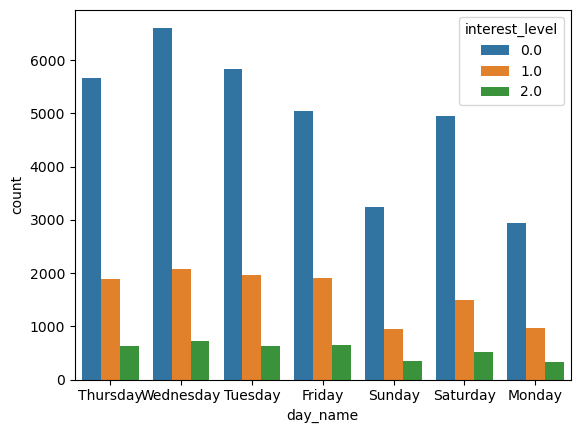

In [38]:
sns.countplot(df['day_name'], hue=df['interest_level'])

<AxesSubplot:xlabel='day_name', ylabel='count'>

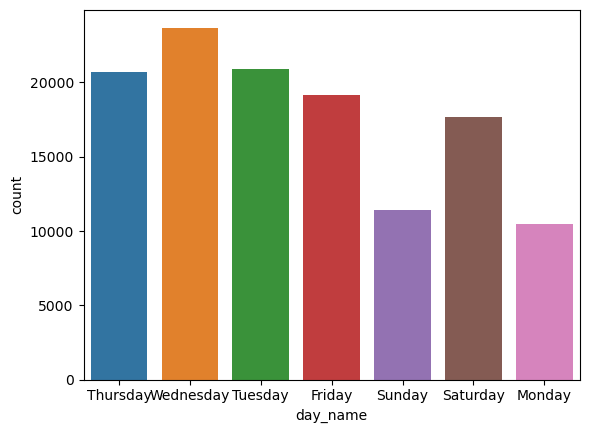

In [39]:
sns.countplot(df['day_name'])

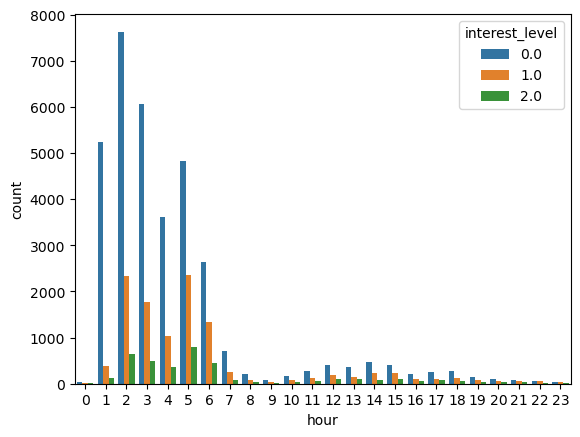

In [40]:
sns.countplot(df['hour'],hue=df['interest_level'])
plt.show()

1 to 7 hours of the day shows highest level of count of interest levels

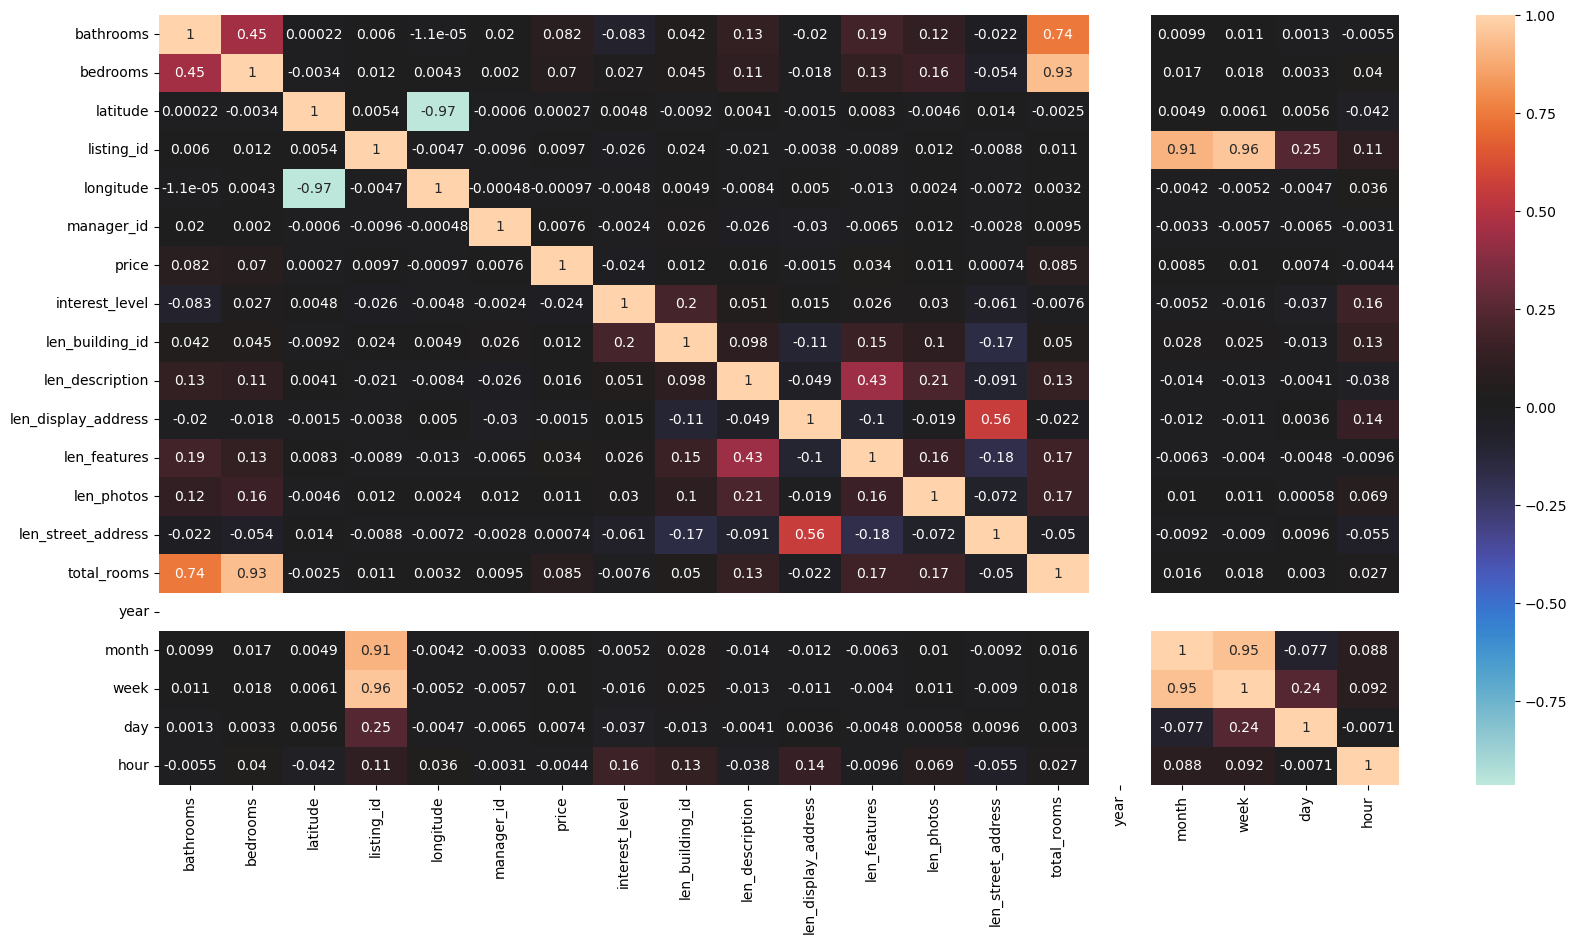

In [41]:
#Checking correlation of different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='icefire',annot=True)
plt.show()

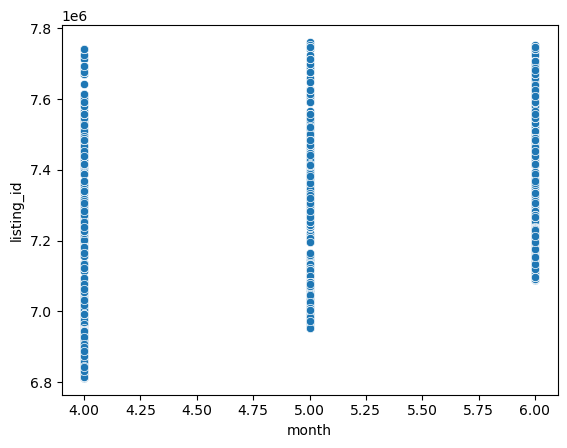

In [42]:
#Checking the relation of month with listing id
sns.scatterplot(df['month'],df['listing_id'])
plt.show()

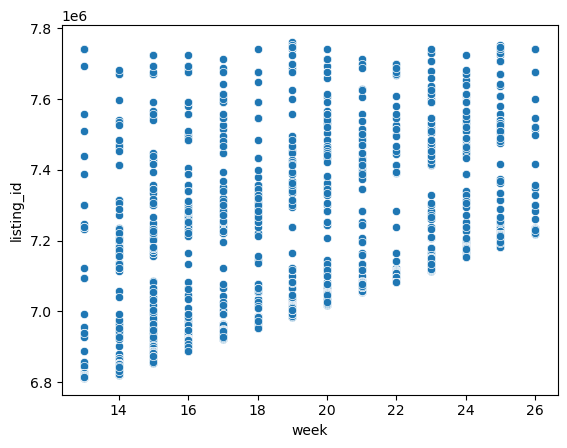

In [43]:
#Checking the relation of week with listing id
sns.scatterplot(df['week'],df['listing_id'])
plt.show()

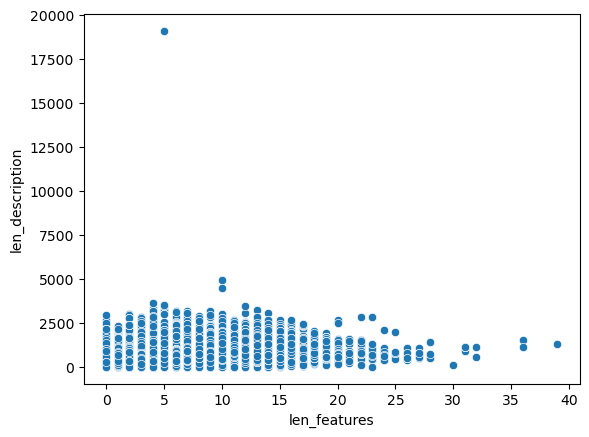

In [44]:
#checking relation of len of feature with len of discription
sns.scatterplot(df['len_features'],df['len_description'])
plt.show()

In [45]:
df.drop('day_name',axis=1,inplace=True)

### Summary
1. low interest level has highest counts
2. There is a slight difference in month wise count
3. Date 11 and 21 shows maximum counts
4. Wednesday show highest count or high activity on the day.

## Model Building

In [46]:
#you can scale your data using stander scalar
#Here I'm not scaling it as we are doing classification
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()

In [47]:
#Creating a function to calculate accuracy score, how confusion matrix and to show classification report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def metrix(algo,y_test, pred,y_train,x_train):
    train_acc = accuracy_score(y_train, algo.predict(x_train))
    accuracy_score_ = accuracy_score(y_test, pred)
    confusion_matrix_ = confusion_matrix(y_test,pred)
    classification_report_ = classification_report(y_test,pred)
    print(f'training accuracy {algo}: {train_acc}')
    print(f'testing accuracy score of {algo}: {accuracy_score_}')
    print(confusion_matrix_)
    print(classification_report_)

In [48]:
#Taking target variable from dataset with length equals to len of train
y = df['interest_level'][:len_train]
len(y), len_train

(49352, 49352)

In [49]:
#Dropping target variable
df.drop('interest_level',axis=1,inplace=True)

In [50]:
#Confirming null values
df.isnull().sum()

bathrooms              0
bedrooms               0
latitude               0
listing_id             0
longitude              0
manager_id             0
price                  0
len_building_id        0
len_description        0
len_display_address    0
len_features           0
len_photos             0
len_street_address     0
total_rooms            0
year                   0
month                  0
week                   0
day                    0
hour                   0
dtype: int64

In [51]:
#we are saperating train and test datasets with len variable we created at start
x = df[:len_train]
test = df[len_train:]

In [52]:
len(x), len(test)

(49352, 74659)

In [53]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dtmodel = dt.fit(x_train, y_train)

In [55]:
dtpred = dtmodel.predict(x_test)

In [56]:
%%time
metrix(dtmodel, y_test, dtpred, y_train, x_train)

training accuracy DecisionTreeClassifier(): 1.0
testing accuracy score of DecisionTreeClassifier(): 0.652438200729434
[[8074 1778  422]
 [1702 1259  449]
 [ 348  447  327]]
              precision    recall  f1-score   support

         0.0       0.80      0.79      0.79     10274
         1.0       0.36      0.37      0.37      3410
         2.0       0.27      0.29      0.28      1122

    accuracy                           0.65     14806
   macro avg       0.48      0.48      0.48     14806
weighted avg       0.66      0.65      0.65     14806

CPU times: total: 46.9 ms
Wall time: 112 ms


In [57]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rfmodel = rf.fit(x_train, y_train)
rfpred = rfmodel.predict(x_test)

In [58]:
%%time
metrix(rfmodel, y_test, rfpred, y_train, x_train)

training accuracy RandomForestClassifier(): 0.9999710530886354
testing accuracy score of RandomForestClassifier(): 0.7309198973389166
[[9575  655   44]
 [2236 1005  169]
 [ 416  464  242]]
              precision    recall  f1-score   support

         0.0       0.78      0.93      0.85     10274
         1.0       0.47      0.29      0.36      3410
         2.0       0.53      0.22      0.31      1122

    accuracy                           0.73     14806
   macro avg       0.60      0.48      0.51     14806
weighted avg       0.69      0.73      0.70     14806

CPU times: total: 1.2 s
Wall time: 1.31 s


### Adaboost

In [59]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
adamodel = ada.fit(x_train, y_train)
adapred = adamodel.predict(x_test)

In [60]:
%%time
metrix(adamodel, y_test, adapred, y_train, x_train)

training accuracy AdaBoostClassifier(): 0.7224859607479882
testing accuracy score of AdaBoostClassifier(): 0.7181548021072538
[[9657  573   44]
 [2487  779  144]
 [ 524  401  197]]
              precision    recall  f1-score   support

         0.0       0.76      0.94      0.84     10274
         1.0       0.44      0.23      0.30      3410
         2.0       0.51      0.18      0.26      1122

    accuracy                           0.72     14806
   macro avg       0.57      0.45      0.47     14806
weighted avg       0.67      0.72      0.67     14806

CPU times: total: 422 ms
Wall time: 538 ms


### Gradient Boosting

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gbmodel = gb.fit(x_train, y_train)
gbpred = gbmodel.predict(x_test)

In [62]:
%%time
metrix(gbmodel, y_test, gbpred, y_train, x_train)

training accuracy GradientBoostingClassifier(): 0.7419382851849707
testing accuracy score of GradientBoostingClassifier(): 0.7263271646629744
[[9770  483   21]
 [2521  792   97]
 [ 505  425  192]]
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85     10274
         1.0       0.47      0.23      0.31      3410
         2.0       0.62      0.17      0.27      1122

    accuracy                           0.73     14806
   macro avg       0.62      0.45      0.48     14806
weighted avg       0.68      0.73      0.68     14806

CPU times: total: 281 ms
Wall time: 345 ms


### XGBoost

In [63]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xgmodel = xg.fit(x_train, y_train)
xgpred = xgmodel.predict(x_test)

In [64]:
%%time
metrix(xgmodel, y_test, xgpred, y_train, x_train)

training accuracy XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...): 0.8514155039657268
testing accuracy score of XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              ev

### LGBM

In [65]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lgmodel = lg.fit(x_train, y_train)
lgpred = lgmodel.predict(x_test)

In [66]:
%%time
metrix(lgmodel, y_test, lgpred, y_train, x_train)

training accuracy LGBMClassifier(): 0.7994268511549818
testing accuracy score of LGBMClassifier(): 0.739362420640281
[[9515  719   40]
 [2095 1150  165]
 [ 341  499  282]]
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86     10274
         1.0       0.49      0.34      0.40      3410
         2.0       0.58      0.25      0.35      1122

    accuracy                           0.74     14806
   macro avg       0.62      0.50      0.53     14806
weighted avg       0.71      0.74      0.71     14806

CPU times: total: 2.67 s
Wall time: 249 ms


### Catboost

In [67]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=1)

cat.fit(x_train,y_train)
catpred = cat.predict(x_test)

Learning rate set to 0.094794
0:	learn: 1.0309983	total: 189ms	remaining: 3m 9s
1:	learn: 0.9756977	total: 210ms	remaining: 1m 44s
2:	learn: 0.9325541	total: 228ms	remaining: 1m 15s
3:	learn: 0.8953033	total: 250ms	remaining: 1m 2s
4:	learn: 0.8644561	total: 268ms	remaining: 53.3s
5:	learn: 0.8372415	total: 284ms	remaining: 47.1s
6:	learn: 0.8162825	total: 298ms	remaining: 42.2s
7:	learn: 0.7972355	total: 311ms	remaining: 38.6s
8:	learn: 0.7812621	total: 325ms	remaining: 35.8s
9:	learn: 0.7673324	total: 339ms	remaining: 33.6s
10:	learn: 0.7535771	total: 354ms	remaining: 31.8s
11:	learn: 0.7426064	total: 367ms	remaining: 30.3s
12:	learn: 0.7328827	total: 381ms	remaining: 29s
13:	learn: 0.7245495	total: 396ms	remaining: 27.9s
14:	learn: 0.7168383	total: 411ms	remaining: 27s
15:	learn: 0.7098057	total: 427ms	remaining: 26.3s
16:	learn: 0.7038379	total: 444ms	remaining: 25.6s
17:	learn: 0.6975049	total: 458ms	remaining: 25s
18:	learn: 0.6919432	total: 473ms	remaining: 24.4s
19:	learn: 0.68

In [68]:
%%time
metrix(cat, y_test, catpred, y_train, x_train)

training accuracy <catboost.core.CatBoostClassifier object at 0x0000027CD1C19700>: 0.8227870086261796
testing accuracy score of <catboost.core.CatBoostClassifier object at 0x0000027CD1C19700>: 0.7424692692151831
[[9451  783   40]
 [1981 1250  179]
 [ 334  496  292]]
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86     10274
         1.0       0.49      0.37      0.42      3410
         2.0       0.57      0.26      0.36      1122

    accuracy                           0.74     14806
   macro avg       0.62      0.52      0.55     14806
weighted avg       0.71      0.74      0.72     14806

CPU times: total: 422 ms
Wall time: 153 ms


### Summary
1. Most of our models are overfitting
2. We saw highest accuracy of CatBoostClassifier on testing dataset which is 74.24% and f1 score 0.86
3. We saw lowest accuracy of DecisionTreeClassifier on testing dataset which is 65.22% and f1 score 0.79

## Hyperparameter Tuning

I have done hyperparameter tuning for 2 algorithms, you can try for remaining ones 

In [69]:
#param_grid = {
#    'n_estimators': range(10,200,10)
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

In [70]:
#param_grid = {
#    'criterion': ["gini", "entropy", "log_loss"]
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

In [71]:
#param_grid = {
#    'max_depth': range(1,50,5)
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

In [72]:
#param_grid = {
#    'min_samples_split': range(1,5,1)
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

In [73]:
#param_grid = {
#    'min_samples_leaf': range(1,5,1)
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

In [74]:
#param_grid = {
#    'max_features': ["sqrt", "log2", None]
#    
#}
#rf = RandomForestClassifier()
#rd = GridSearchCV(estimator=rf,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#
#rdmodel = rd.fit(x, y)
#rdmodel.best_params_

I have commented above cells, you can comment out that cells and run them
I found out these best parameters

In [75]:
rf = RandomForestClassifier(n_estimators=70,
                           criterion='log_loss',
                           max_depth=6,
                           min_samples_leaf=4,
                           min_samples_split=3,
                           max_features = None)
rfmodel = rf.fit(x_train, y_train)


In [76]:
%%time
rfpred = rfmodel.predict(x_test)
metrix(rfmodel, y_test, rfpred, y_train, x_train)

training accuracy RandomForestClassifier(criterion='log_loss', max_depth=6, max_features=None,
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=70): 0.7183176055114919
testing accuracy score of RandomForestClassifier(criterion='log_loss', max_depth=6, max_features=None,
                       min_samples_leaf=4, min_samples_split=3,
                       n_estimators=70): 0.7132243684992571
[[10049   192    33]
 [ 2957   331   122]
 [  733   209   180]]
              precision    recall  f1-score   support

         0.0       0.73      0.98      0.84     10274
         1.0       0.45      0.10      0.16      3410
         2.0       0.54      0.16      0.25      1122

    accuracy                           0.71     14806
   macro avg       0.57      0.41      0.41     14806
weighted avg       0.65      0.71      0.64     14806

CPU times: total: 438 ms
Wall time: 534 ms


In [77]:
#param_grid = {
#    'num_leaves': range(1,10,1)
#    
#}
#lg = lgb.LGBMClassifier()
#
#clf = GridSearchCV(estimator=lg,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#lgmodel = clf.fit(x,y)
#lgmodel.best_params_

In [78]:
#param_grid = {
#    'max_depth': range(1,10,1)
#    
#}
#lg = lgb.LGBMClassifier()
#
#clf = GridSearchCV(estimator=lg,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#lgmodel = clf.fit(x,y)
#lgmodel.best_params_

In [79]:
#param_grid = {
#    'learning_rate': [0.001,0.003,0.005,0.007,0.01,0.05,0.1,0.5,1]
#    
#}
#lg = lgb.LGBMClassifier()
#
#clf = GridSearchCV(estimator=lg,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#lgmodel = clf.fit(x,y)
#lgmodel.best_params_

In [80]:
#param_grid = {
#    'n_estimators': [10,30,50,100,200,500]
#    
#}
#lg = lgb.LGBMClassifier()
#
#clf = GridSearchCV(estimator=lg,
#                  param_grid=param_grid,
#                  scoring='accuracy',
#                  cv=3,
#                  return_train_score=True,
#                  verbose=2)
#lgmodel = clf.fit(x,y)
#lgmodel.best_params_

In [81]:
lg = lgb.LGBMClassifier(n_estimators=10,
                       learning_rate=0.007,
                       max_depth=1,
                       num_leaves=2)
lgmodel = lg.fit(x_train, y_train)
lgpred = lgmodel.predict(x_test)

In [82]:
metrix(lgmodel, y_test, lgpred, y_train, x_train)

training accuracy LGBMClassifier(learning_rate=0.007, max_depth=1, n_estimators=10, num_leaves=2): 0.6950153418630232
testing accuracy score of LGBMClassifier(learning_rate=0.007, max_depth=1, n_estimators=10, num_leaves=2): 0.6939078751857355
[[10274     0     0]
 [ 3410     0     0]
 [ 1122     0     0]]
              precision    recall  f1-score   support

         0.0       0.69      1.00      0.82     10274
         1.0       0.00      0.00      0.00      3410
         2.0       0.00      0.00      0.00      1122

    accuracy                           0.69     14806
   macro avg       0.23      0.33      0.27     14806
weighted avg       0.48      0.69      0.57     14806



### Summary
1. I was able to make the generalized model by avoiding overfitting and underfitting
2. RandomForestClassifier with training accuracy of 71% and testing accuracy of 71% and f1 score 0.84
3. LGBMClassifier with training accuracy of 69% and testing accuracy of 69% and f1 score 0.82

## Making Submission file

In [83]:
## Making predictions on test dataset using RandomForestClassifier
test_pred = rfmodel.predict_proba(test)


In [84]:
#Creating a DataFrame of predictions
test_pred = pd.DataFrame(test_pred)
test_pred

,0,1,2
0,0.658167,0.280854,0.060979
1,0.853483,0.114755,0.031762
2,0.991822,0.007697,0.000481
3,0.401964,0.403340,0.194696
4,0.726030,0.230574,0.043396
...,...,...,...
74654,0.249628,0.414003,0.336369
74655,0.684855,0.252656,0.062489
74656,0.983992,0.015249,0.000759
74657,0.829101,0.146695,0.024203


In [85]:
#labeling columns of prediction by interest level
test_pred['high'] = test_pred[2]
test_pred['medium'] = test_pred[1]
test_pred['low'] = test_pred[0]
test_pred

,0,1,2,high,medium,low
0,0.658167,0.280854,0.060979,0.060979,0.280854,0.658167
1,0.853483,0.114755,0.031762,0.031762,0.114755,0.853483
2,0.991822,0.007697,0.000481,0.000481,0.007697,0.991822
3,0.401964,0.403340,0.194696,0.194696,0.403340,0.401964
4,0.726030,0.230574,0.043396,0.043396,0.230574,0.726030
...,...,...,...,...,...,...
74654,0.249628,0.414003,0.336369,0.336369,0.414003,0.249628
74655,0.684855,0.252656,0.062489,0.062489,0.252656,0.684855
74656,0.983992,0.015249,0.000759,0.000759,0.015249,0.983992
74657,0.829101,0.146695,0.024203,0.024203,0.146695,0.829101


In [86]:
#Reading sample submission file provided by kaagle
sample = pd.read_csv('sample_submission.csv')
sample

,listing_id,high,medium,low
0,7142618,0.077788,0.227529,0.694683
1,7210040,0.077788,0.227529,0.694683
2,7174566,0.077788,0.227529,0.694683
3,7191391,0.077788,0.227529,0.694683
4,7171695,0.077788,0.227529,0.694683
...,...,...,...,...
74654,6928108,0.077788,0.227529,0.694683
74655,6906674,0.077788,0.227529,0.694683
74656,6897967,0.077788,0.227529,0.694683
74657,6842183,0.077788,0.227529,0.694683


In [87]:
#Saving predicted values in sample submission file
sample['high'] = test_pred[2]
sample['medium'] = test_pred[1]
sample['low'] = test_pred[0]
sample

,listing_id,high,medium,low
0,7142618,0.060979,0.280854,0.658167
1,7210040,0.031762,0.114755,0.853483
2,7174566,0.000481,0.007697,0.991822
3,7191391,0.194696,0.403340,0.401964
4,7171695,0.043396,0.230574,0.726030
...,...,...,...,...
74654,6928108,0.336369,0.414003,0.249628
74655,6906674,0.062489,0.252656,0.684855
74656,6897967,0.000759,0.015249,0.983992
74657,6842183,0.024203,0.146695,0.829101


In [88]:
#saving the submission file
sample.to_csv('submission_final.csv', index = False)

## Conclusion 
1. We were able to make prediction on test dataset with accuracy of 71%
1. After submitting submision file on kaagle, I got a score of 0.57908
